In [42]:
from datetime import datetime
from elasticsearch import Elasticsearch
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

In [43]:
es_ip = "http://127.0.0.1:9200"

In [44]:
es = Elasticsearch(es_ip)

In [54]:
res = es.get(index="winlogbeat", id="IM3k130BMs_nTerjgcWJ")#指定_index(資料庫)，指定_Dcouments id(row xx)
#print(res['_source'])

In [46]:
query_str = {"range":{"@timestamp":{"gte":"2021-12-20", "lte":"2021-12-20"}}}
res = es.search(index="winlogbeat", query=query_str, from_=0, size=1000) #搜尋 index為winlogbeat,查詢條件(body)query為query_str

In [47]:
total_hits = res["hits"]["total"] #計算總筆數
print("total : " + str(total_hits)) #印出總比數有多少hits

total : 8028


In [48]:
#檢視所有資訊(res['hits']['hits']裡)
res = es.search()
print(res)

{'took': 1, 'timed_out': False, '_shards': {'total': 5, 'successful': 5, 'skipped': 0, 'failed': 0}, 'hits': {'total': 46716, 'max_score': 1.0, 'hits': [{'_index': 'winlogbeat', '_type': 'doc', '_id': 'IM3k130BMs_nTerjgcWJ', '_score': 1.0, '_source': {'@timestamp': '2021-12-20T12:50:14.534Z', 'log': {'level': 'information'}, 'host': {'name': 'DESKTOP-T3V8EOP', 'ip': ['fe80::1911:e65c:d649:9768', '192.168.56.1', 'fe80::24c3:baf3:3d58:f2af', '169.254.242.175', 'fe80::a832:f35:3de:862c', '169.254.134.44', 'fe80::d4a8:14f8:2744:a74a', '192.168.0.83', 'fe80::4d6b:1d3e:cee1:343d', '169.254.52.61'], 'mac': ['0a:00:27:00:00:10', '24:ee:9a:ff:17:da', '26:ee:9a:ff:17:d9', '24:ee:9a:ff:17:d9', '24:ee:9a:ff:17:dd'], 'hostname': 'DESKTOP-T3V8EOP', 'architecture': 'x86_64', 'os': {'version': '10.0', 'family': 'windows', 'name': 'Windows 10 Pro', 'kernel': '10.0.22000.318 (WinBuild.160101.0800)', 'build': '22000.318', 'type': 'windows', 'platform': 'windows'}, 'id': '1f725ed7-b14c-494d-9fc1-4bc3eeb0b

In [49]:
query_str = {"size": 0,"aggs": {"result": {"date_histogram": {"field": "@timestamp","interval": "1d","format": "MM-dd"}}}}
res = es.search(index="winlogbeat", body=query_str)
result = res["aggregations"]["result"]["buckets"]
print(result)

[{'key_as_string': '12-17', 'key': 1639699200000, 'doc_count': 54}, {'key_as_string': '12-18', 'key': 1639785600000, 'doc_count': 0}, {'key_as_string': '12-19', 'key': 1639872000000, 'doc_count': 1243}, {'key_as_string': '12-20', 'key': 1639958400000, 'doc_count': 8028}, {'key_as_string': '12-21', 'key': 1640044800000, 'doc_count': 8903}, {'key_as_string': '12-22', 'key': 1640131200000, 'doc_count': 5187}, {'key_as_string': '12-23', 'key': 1640217600000, 'doc_count': 484}, {'key_as_string': '12-24', 'key': 1640304000000, 'doc_count': 3537}, {'key_as_string': '12-25', 'key': 1640390400000, 'doc_count': 4442}, {'key_as_string': '12-26', 'key': 1640476800000, 'doc_count': 4352}, {'key_as_string': '12-27', 'key': 1640563200000, 'doc_count': 5898}, {'key_as_string': '12-28', 'key': 1640649600000, 'doc_count': 3856}, {'key_as_string': '12-29', 'key': 1640736000000, 'doc_count': 732}]


C:\Users\x1tiw\AppData\Local\Temp/ipykernel_23492/3564550829.py:2: DeprecationWarning: The 'body' parameter is deprecated for the 'search' API and will be removed in a future version. Instead use API parameters directly. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  res = es.search(index="winlogbeat", body=query_str)


In [55]:
event_pd = pd.DataFrame(result, columns=["key_as_string", "doc_count"])
#print(event_pd)

event_dd_pd = {'key_as_string':['12-17', '12-18', '12-19', '12-20', '12-21', '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29'],
        'doc_count':[54, 0, 1243, 8028, 8903, 5187, 484, 3537, 4442, 4352, 5898, 3856, 732]} #資料欄列內容
event_df = pd.DataFrame(event_dd_pd) #顯示表格
event_df.head() #顯示表格

,key_as_string,doc_count
0,12-17,54
1,12-18,0
2,12-19,1243
3,12-20,8028
4,12-21,8903


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

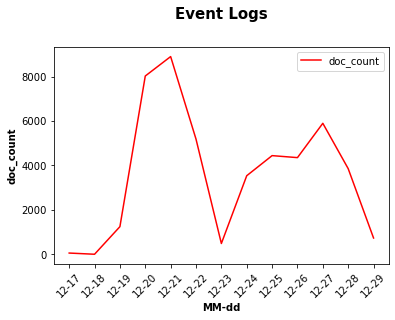

In [51]:
#畫第一條線，plt.plot(x, y, c)分別為x軸資料、y軸資料、線顏色 = 紅色
plt.plot(event_df['key_as_string'], event_df['doc_count'],c = "r")  
plt.legend(labels=["doc_count"], loc = 'best')            # 設定圖例，參數為標籤, 位置
plt.xlabel("MM-dd", fontweight = "bold")                # 設定x軸標題及粗體
plt.ylabel("doc_count", fontweight = "bold")    # 設定y軸標題及粗體
# 設定標題、文字大小、粗體及位置
plt.title("Event Logs", fontsize = 15, fontweight = "bold", y = 1.1)   
plt.xticks(rotation=45)   # 將x軸數字旋轉45度

In [52]:
query_str = {"size": 0,"aggregations": {"result": { "terms": {"field": "winlog.event_data.ProcessId.keyword","order": [{"_count": "desc"}]}}}}
res = es.search(index="winlogbeat", body=query_str)
result = res["aggregations"]["result"]["buckets"]
print(result)

[{'key': '8640', 'doc_count': 1158}, {'key': '12564', 'doc_count': 965}, {'key': '23260', 'doc_count': 669}, {'key': '12692', 'doc_count': 641}, {'key': '19732', 'doc_count': 554}, {'key': '19608', 'doc_count': 483}, {'key': '30516', 'doc_count': 450}, {'key': '34100', 'doc_count': 422}, {'key': '15704', 'doc_count': 418}, {'key': '14948', 'doc_count': 389}]


C:\Users\x1tiw\AppData\Local\Temp/ipykernel_23492/4089627785.py:2: DeprecationWarning: The 'body' parameter is deprecated for the 'search' API and will be removed in a future version. Instead use API parameters directly. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  res = es.search(index="winlogbeat", body=query_str)


Text(0.5, 1.0, 'Event Logs')

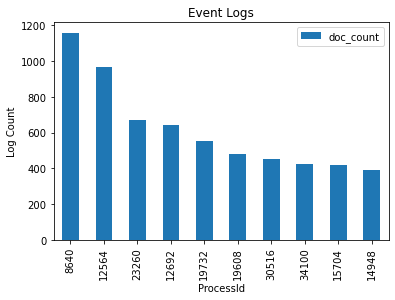

In [56]:
event_pd = pd.DataFrame(result, columns=["key", "doc_count"])
#print(event_pd)
event_pd.plot(x="key", y="doc_count", kind="bar");
plt.xlabel('ProcessId')
plt.ylabel('Log Count')
plt.title('Event Logs')